In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### data

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(s, header=None, encoding='utf-8')
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### Class distribution

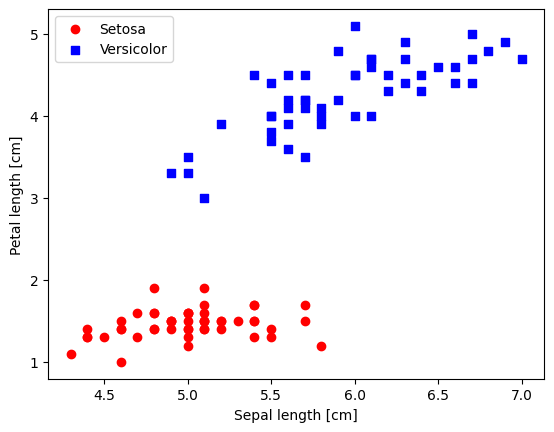

In [3]:
# select setosa and versicolor
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# extract sepal length and petal length
X = data.iloc[0:100, [0, 2]].values
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

##### Graphical view of decision boundary

In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

### MP Neuron

In [5]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def normalization(self, X):
        X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
        X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
        return X
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        X_norm = self.normalization(X)
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X_norm, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
                
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
        
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

##### Training and Testing MP Neuron

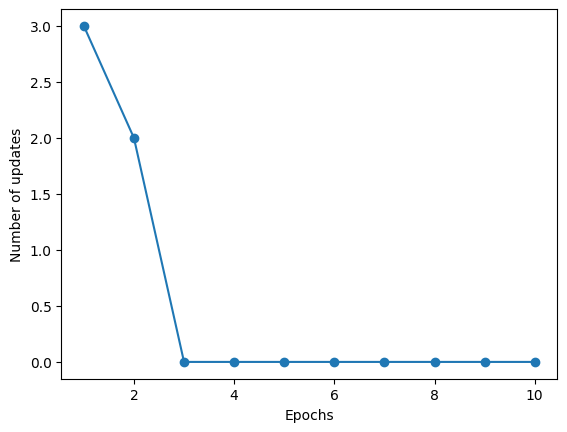

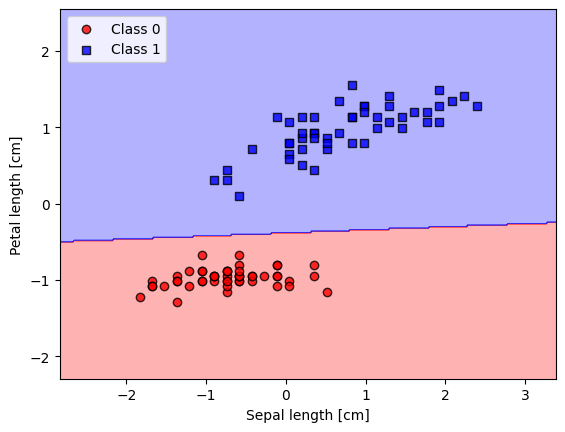

(None, None)

In [6]:
ppn = Perceptron(eta=0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show(), plot_decision_regions(X, y, classifier=ppn)

### Adaline

In [7]:
class AdalineGD:
    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def normalization(self, X):
        X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
        X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
        return X
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        X_norm = self.normalization(X)
        
        for i in range(self.n_iter):
            net_input = self.net_input(X_norm)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X_norm.T.dot(errors) / X_norm.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
                
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X
        
    def predict(self, X):
        return  np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

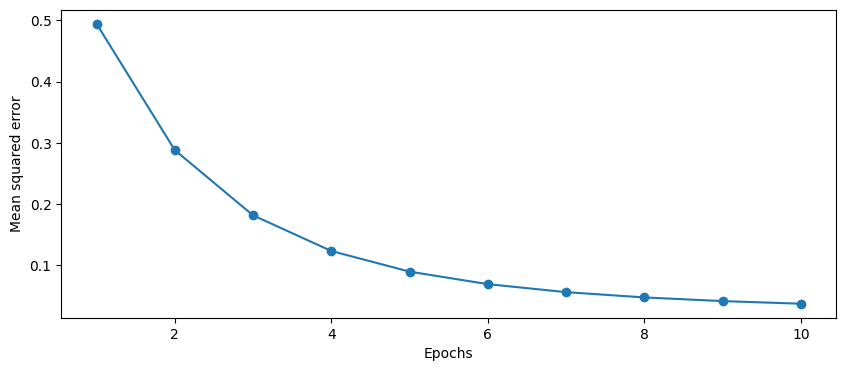

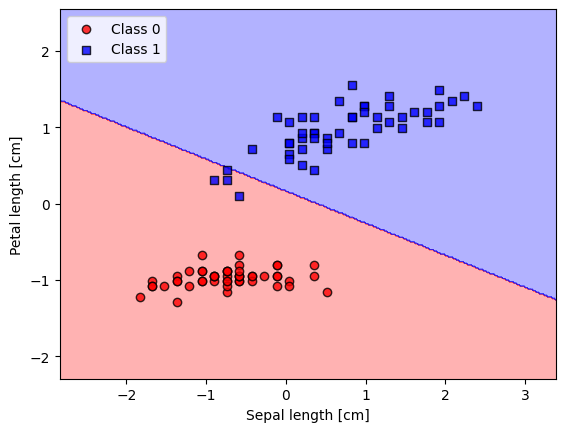

(None, None)

In [8]:
agd = AdalineGD(eta=0.1, n_iter = 10)
agd.fit(X, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(range(1, len(agd.losses_) + 1), agd.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
plt.show(), plot_decision_regions(X, y, classifier=agd)

In [9]:
class AdalineSGD:
    def __init__(self, eta=0.1, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def normalization(self, X):
        X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
        X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
        return X
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        X_norm = self.normalization(X)
        for i in range(self.n_iter):
            if self.shuffle:
                X_norm, y = self._shuffle(X_norm, y)
            losses = []
            for xi, target in zip(X_norm, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y): ## for online training
        X_norm = self.normalization(X)
        if not self.w_initialized:
            self._initialize_weights(X_norm.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X_norm, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X_norm, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X
        
    def predict(self, X):
        return  np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

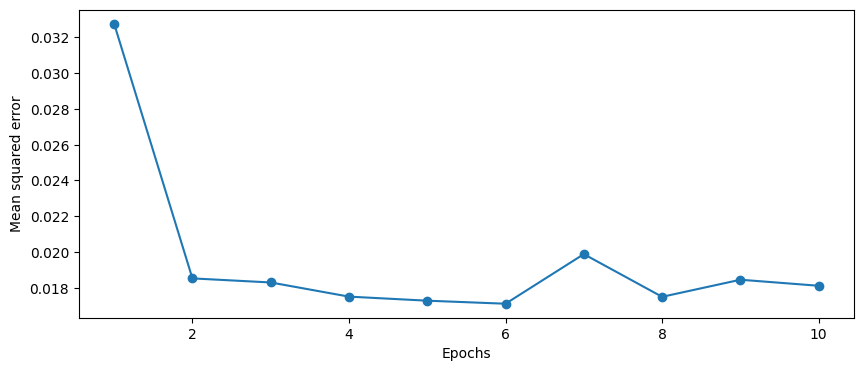

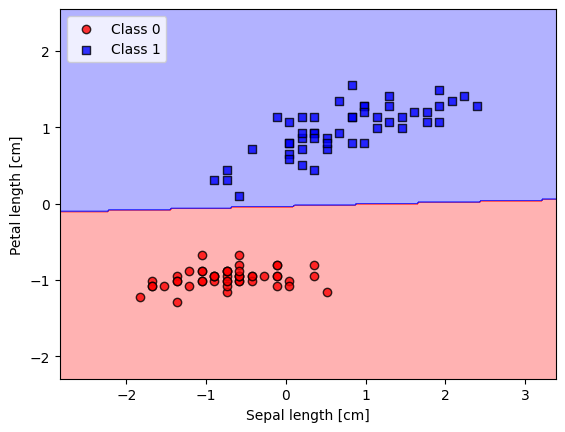

(None, None)

In [10]:
asgd = AdalineSGD(eta=0.1, n_iter = 10)
asgd.fit(X, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(range(1, len(asgd.losses_) + 1), asgd.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
plt.show(), plot_decision_regions(X, y, classifier=asgd)

In [11]:
import numpy as np

class AdalineMiniBatch:
    def __init__(self, eta=0.1, n_iter=10, shuffle=True, random_state=None, batch_size = 8):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        self.batch_size = batch_size
        
    def normalization(self, X):
        X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
        X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
        return X
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        X_norm = self.normalization(X)
        
        for i in range(self.n_iter):
            if self.shuffle:
                X_norm, y = self._shuffle(X_norm, y)
            losses = []
            for j in range(int(np.ceil(X_norm.shape[0]/self.batch_size))):
                l = j * self.batch_size
                losses.append(self._update_weights(X_norm[l : l + self.batch_size], y[l : l + self.batch_size]))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        outputs = self.activation(self.net_input(xi))
        errors = (target - outputs)
        self.w_ += self.eta * 2.0 * xi.T.dot(errors) / xi.shape[0]
        self.b_ += self.eta * 2.0 * errors.mean()
        loss = (errors**2).mean()
        return loss
        
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X
        
    def predict(self, X):
        return  np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

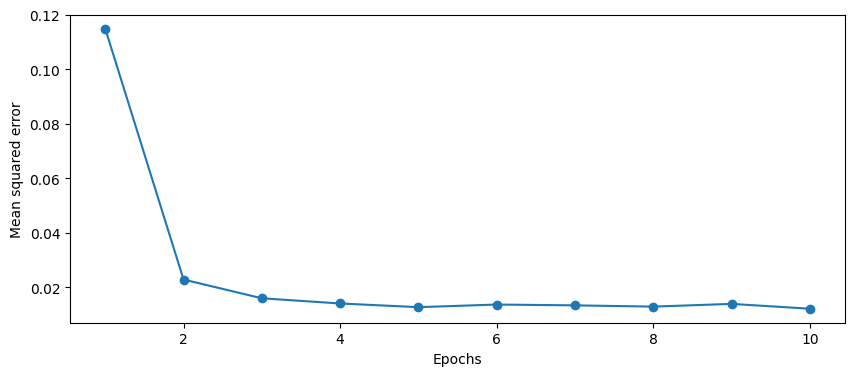

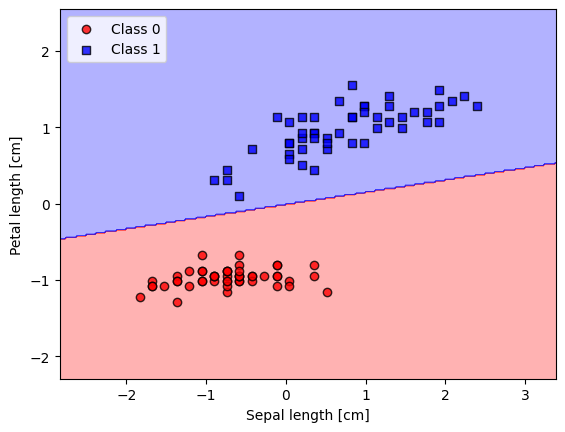

(None, None)

In [12]:
asmi = AdalineMiniBatch(eta=0.1, n_iter = 10)
asmi.fit(X, y)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.plot(range(1, len(asmi.losses_) + 1), asmi.losses_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean squared error')
plt.show(), plot_decision_regions(X, y, classifier=asmi)